# Test Envoiriment for the  functions in the module

[How To Use Conda Environment In a Jupyter Notebook
](https://saturncloud.io/blog/how-to-use-conda-environment-in-a-jupyter-notebook/#:~:text=Using%20a%20Conda%20Environment%20in%20Jupyter%20Notebook&text=This%20package%20allows%20you%20to,be%20used%20in%20Jupyter%20Notebook.&text=This%20will%20create%20a%20new%20kernel%20for%20the%20“myenv”%20environment,be%20used%20in%20Jupyter%20Notebook.)

## Train

In [ ]:
#!python main.py --model --datasetpath --state "train" --pretrained_path --output_path

## Teste de funções de érda que serão utilizadas

In [8]:
from loss import *
from Metrics import *
from torch.nn.functional import mse_loss
from kornia.losses import ssim_loss
from numpy import mean 
from time import time
import lpips

class ssim_1(nn.Module):
    def __init__(self, window_size):
        super(ssim_1,self).__init__()
        self.window_size = window_size
    def forward(self, input, target):
        return ssim_loss(input, target, self.window_size)

class mse_1(nn.Module):
    def __init__(self):
        super(mse_1,self).__init__()

    def forward(self, input, target):
        return mse_loss(input, target)

gt_image = torch.randn(1, 3, 64, 64, requires_grad=True)
t_image = torch.randn(1, 3, 64, 64, requires_grad=True)
mean_val = mean(t_image.detach().numpy())

# Example usage of the Dark Channel Prior loss function
#find patch size
patch_size = 5
print(mean)
losses = {
    "DarkChannelPriorLoss": DarkChannelPriorLoss(patch_size),
    "L_exp": L_exp(patch_size,mean_val),
    "L_color": L_color(),
    "mse_loss":mse_1(),
    "light_loss": light_loss2(),
    "color_loss": color_loss2(),
    "L1Loss": L1Loss(),
    "SSIM loss":ssim_1(window_size=11),
    "lch_loss": lch_Loss(),
    "lab_loss": lab_Loss(),
    "loss_fn_alex" : lpips.LPIPS(net='alex'), # best forward scores
    "loss_fn_vgg" : lpips.LPIPS(net='vgg'), # closer to "traditional" perceptual loss, when used for optimization
    "loss_squeeze" : lpips.LPIPS(net='squeeze') # lightest, faster, narrower, lower quality
}

for name, loss in losses.items():
    start_time = time()
    if name== "loss_fn_vgg" or name == "loss_squeeze" or name == "loss_fn_alex" or name == "L1Loss" or name == "light_loss" or name == "color_loss" or name == "SSIM loss" or name == "color_loss" or name == "mse_loss" or name == "lab_loss" or name == "lch_loss":
        loss = loss(gt_image, t_image)
    else:
        loss = loss(t_image)
    end_time = time()
    print(name, ":", loss.item(), "// Time:", end_time-start_time)


<function mean at 0x77d6e03c6020>
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [squeeze], v[0.1], spatial [off]
Loading model from: /home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/lpips/weights/v0.1/squeeze.pth
DarkChannelPriorLoss : -4.091731548309326 // Time: 0.000232696533203125
L_exp : 0.011746272444725037 // Time: 0.0001773834228515625
L_color : 3.982763519161381e-05 // Time: 0.00012874603271484375
mse_loss : 1.9858440160751343 // Time: 6.437301635742188e-05
light_loss : 0.7579351663589478 // Time: 0.00023174285888671875
color_loss : 0.9887773990631104 // Time: 0.002427339553833008
L1Loss : 1.1202781200408936 // Time: 4.649162292480469e-05
SSIM loss : 0.4979829788208008 // Time: 0.003293275833129883
lch_loss : 154.82911682128906 // Time: 0.011107921600341797
lab_loss : 25146.662109375 // Time: 0.0026063919067382812
loss_fn_alex : 0.11614850163459778 // Time: 0.007351398468017578
loss_fn

/home/gusanagy/anaconda3/envs/CLEDiff/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Funcao para carregar as imagens do diretorio raiz

In [5]:
import os
import glob

def load_image_paths(dataset_path, dataset="all",task="train"):
    """
    dataset_path: endereço do dataset raiz
    dataset: "all", "UIEB", "RUIE", "SUIM"
    task: "train", "val"

    """
    image_paths = []
    if dataset == "all":
        # Constrói os padrões de caminho para os arquivos .jpg e .png dentro das pastas train e train/images
        pattern1_jpg = os.path.join(dataset_path, "*", f"{task}", "*.jpg")
        pattern2_jpg = os.path.join(dataset_path, "*", f"{task}", "images", "*.jpg")
        pattern1_png = os.path.join(dataset_path, "*", f"{task}", "*.png")
        pattern2_png = os.path.join(dataset_path, "*", f"{task}", "images", "*.png")
        pattern3_jpg = os.path.join(dataset_path, "*", "*",f"{task}", "*.jpg")

        
        # Encontra todos os arquivos .jpg e .png correspondentes aos padrões
        image_paths.extend(glob.glob(pattern1_jpg))
        image_paths.extend(glob.glob(pattern2_jpg))
        image_paths.extend(glob.glob(pattern1_png))
        image_paths.extend(glob.glob(pattern2_png))
        image_paths.extend(glob.glob(pattern3_jpg))
    elif dataset == "SUIM":
         pattern2_jpg = os.path.join(dataset_path, "*", f"{task}", "images", "*.jpg")
         image_paths.extend(glob.glob(pattern2_jpg))
    elif dataset == "UIEB":
        pattern1_png = os.path.join(dataset_path, "*", f"{task}", "*.png")
        image_paths.extend(glob.glob(pattern1_png))
    elif dataset == "RUIE":
        pattern3_jpg = os.path.join(dataset_path, "*", "*",f"{task}", "*.jpg")
        image_paths.extend(glob.glob(pattern3_jpg))
        
    return image_paths
dataset_path = "data/UDWdata/"  # Caminho para a pasta do dataset

data = load_image_paths(dataset_path,dataset="SUIM")

print(len(data))

1525


### Teste dataloader e batch de imagens do dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total training examples: 3804


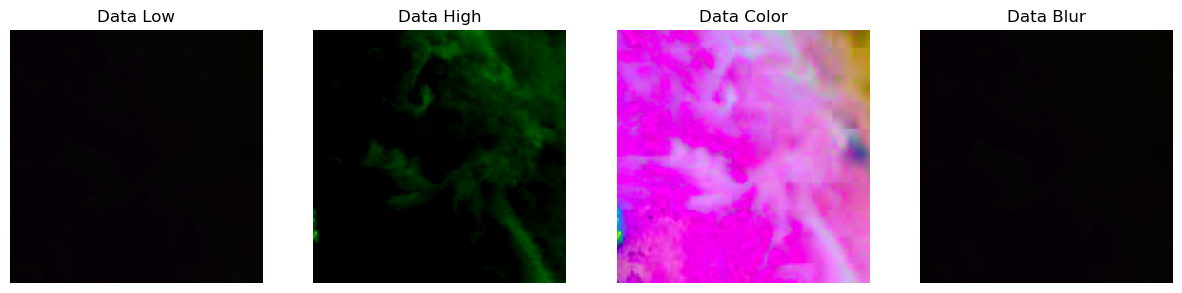

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


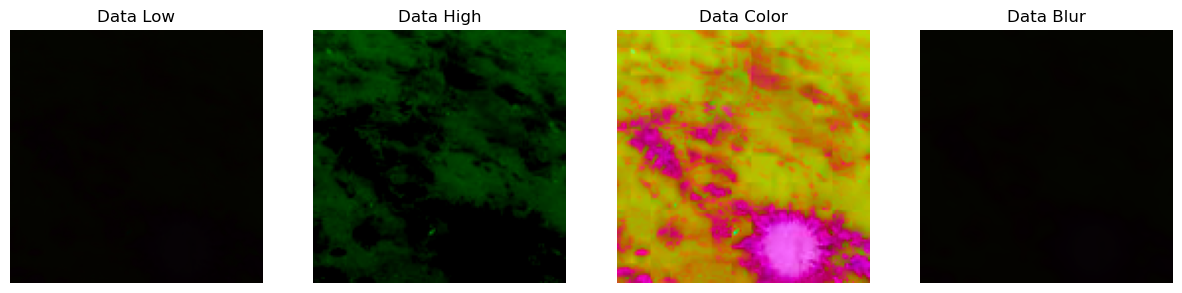

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


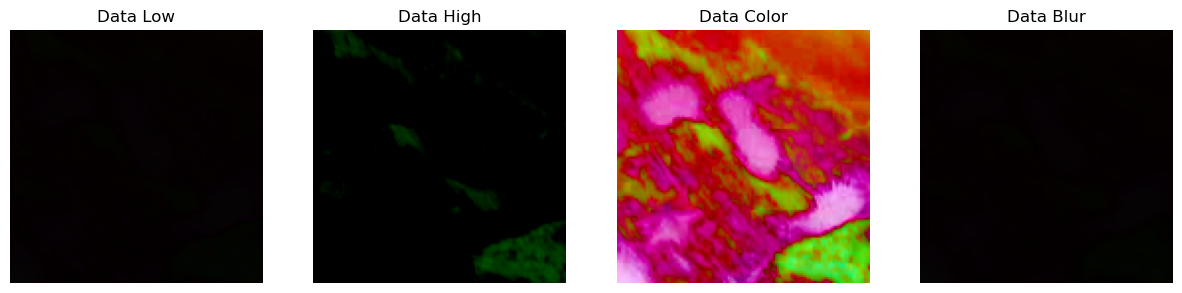

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


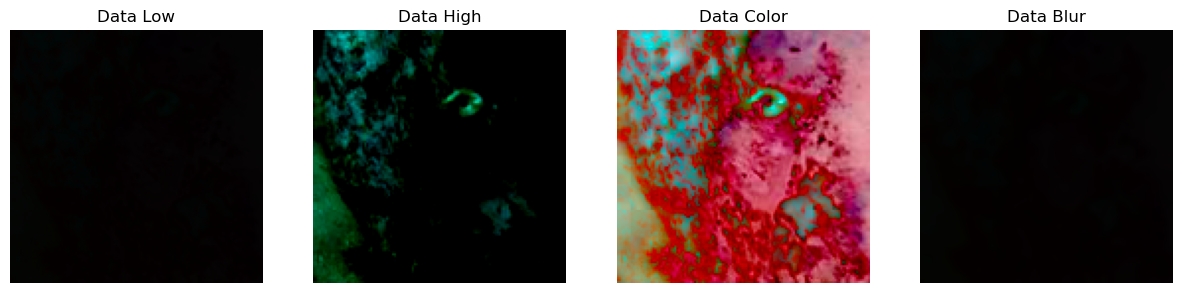

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


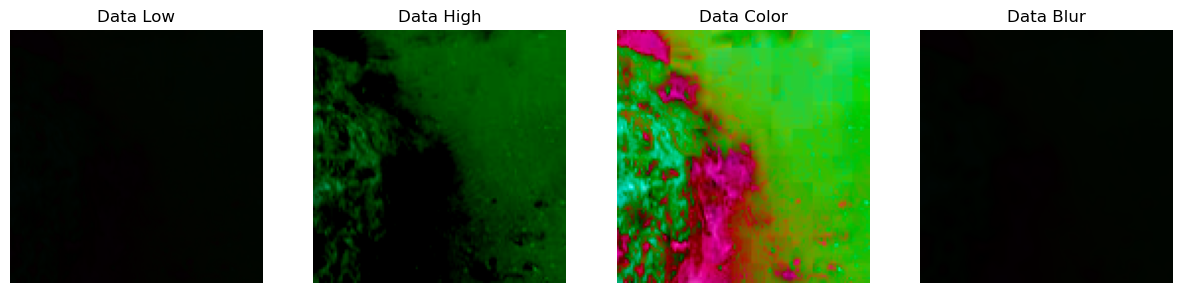

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from src.train import load_data
from src.split_data import load_image_paths
import matplotlib.pyplot as plt
import numpy as np
import torch

def test_dataloader(dataloader, num_images=5):
    # Itera sobre o DataLoader
    for batch_idx, (data_low, data_high, data_color, data_blur) in enumerate(dataloader):
        if batch_idx >= num_images:
            break
        # Plotagem das imagens
        #Convertendo tensores para NumPy arrays para plotagem
        image_low = np.transpose(data_low.detach().cpu().numpy(), (1, 2, 0))
        image_high = np.transpose(data_high.detach().cpu().numpy(), (1, 2, 0))
        image_color = np.transpose(data_color.detach().cpu().numpy(), (1, 2, 0))
        image_blur = np.transpose(data_blur.detach().cpu().numpy(), (1, 2, 0))
                # Transpose and print shapes
        # print(f"""  data_low: {data_low.shape}
        #                 data_high: {data_high.shape}
        #                 data_color: {data_color.shape}
        #                 data_blur: {data_blur.shape}
        #                 image_low: {image_low.shape}
        #                 image_high: {image_high.shape}
        #                 image_color: {image_color.shape}
        #                 image_blur: {image_blur.shape}
        # """)
        # Mostrando as imagens
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 4, 1)
        plt.imshow(image_low)
        plt.title("Data Low")
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.imshow(image_high)
        plt.title("Data High")
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.imshow(image_color)
        plt.title("Data Color")
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.imshow(image_blur)
        plt.title("Data Blur")
        plt.axis('off')

        plt.show()


# Exemplo de uso:
datapath_train = load_image_paths(dataset_path="data/UDWdata/",dataset="RUIE")
train_loader=load_data(datapath_train, datapath_train)
# Suponha que você tenha um DataLoader chamado 'train_loader' com batch_size=4
test_dataloader(train_loader, num_images=5)


### Checando erro do canal alpha nas imagens do dataset

In [3]:
from src.split_data import check_alpha_channel
c = check_alpha_channel("data/UDWdata/RUIE/UIQS/train/A_23.jpg")
c = check_alpha_channel("data/UDWdata/UIEB/train/32_img_.png")


Antes de se transformar:  (300, 400, 3) data/UDWdata/RUIE/UIQS/train/A_23.jpg
transformada : (300, 400, 4)
Antes de se transformar:  (801, 1280, 3) data/UDWdata/UIEB/train/32_img_.png
transformada : (801, 1280, 4)


### Calculando a media e o desvio padrao para normalização do dataset

In [2]:
import torch
from torchvision import datasets, transforms
import torch.utils.data as data
from torch.utils.data import DataLoader
from src.split_data import load_image_paths
import random
import cv2
from albumentations.pytorch import ToTensorV2
import albumentations as A
import numpy as np

class load_data(data.Dataset):
    def __init__(self, input_data_low, input_data_high):
        self.input_data_low = input_data_low
        self.input_data_high = input_data_high
        print("Total training examples:", len(self.input_data_high))
        self.transform=A.Compose(
            [
                A. Resize (height=256, width=256),
                # A.RandomCrop(height=128, width=128),
                # A.HorizontalFlip(p=0.5),
                # A.VerticalFlip(p=0.5),
                ToTensorV2()
            ]
        )


    def __len__(self):  
        return len(self.input_data_low)

    def __getitem__(self, idx):
        seed = torch.random.seed()
        data_low = cv2.imread(self.input_data_low[idx])

        ###
        #data_low = check_alpha_channel(self.input_data_low[idx])
        ###

        data_low = cv2.convertScaleAbs(data_low, alpha=1.0, beta=-random.randint(90, 150)) #modificação para ajuste automatico de brilho para datalow

        data_low=data_low[:,:,::-1].copy()
        random.seed(1)
        data_low=data_low/255.0

        data_low=np.power(data_low,0.25)
        data_low = self.transform(image=data_low)["image"]
        #mean and var of lol training dataset. If you change dataset, please change mean and var.
        # mean=torch.tensor([0.4350, 0.4445, 0.4086])  
        # var=torch.tensor([0.0193, 0.0134, 0.0199])
        # data_low=(data_low-mean.view(3,1,1))/var.view(3,1,1)
        # data_low=data_low/20



        return data_low
# Defina as transformações necessárias para as imagens
transform = transforms.Compose([
    transforms.ToTensor()
])

# Carregue o dataset
datapath_train = load_image_paths(dataset_path="data/UDWdata/", dataset="all")
train_loader=load_data(datapath_train, datapath_train)
# Inicialize DataLoader
dataloader = DataLoader(train_loader, batch_size=32, shuffle=False, num_workers=4)

# Inicialize variáveis de acumulação
mean = torch.zeros(3)
mean_square = torch.zeros(3)
total_pixels = 0

# Itere pelo dataset
for images in dataloader:
    #print(images)
    # Obtenha o número de pixels em um lote
    num_pixels = images.size(0) * images.size(2) * images.size(3)
    total_pixels += num_pixels
    
    # Acumule as somas dos canais de cor
    mean += images.sum(dim=[0, 2, 3])
    mean_square += (images ** 2).sum(dim=[0, 2, 3])

# Calcule a média dos canais de cor
mean /= total_pixels

# Calcule a variância dos canais de cor
var = (mean_square / total_pixels) - (mean ** 2)

print(f'Média dos canais de cor: {mean}')
print(f'Variância dos canais de cor: {var}')
# Total training examples: 6130 for all datasets
# Média dos canais de cor: tensor([0.6687, 0.5945, 0.5836])
# Variância dos canais de cor: tensor([0.0112, 0.0183, 0.0198])

Total training examples: 6130
Média dos canais de cor: tensor([0.6687, 0.5945, 0.5837])
Variância dos canais de cor: tensor([0.0112, 0.0183, 0.0198])


## Inference